In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 12, 4
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

In [ ]:
df = pd.read_csv('hotel_bookings_data_bersih.csv')

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
df.sample(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,meal,city,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
9508,Resort Hotel,1,14,2018,February,50,5,1,2,2,Breakfast,Kota Denpasar,Groups,TA/TO,0,0,0,0,No Deposit,134.0,0,Family,84.0,0,0,Canceled
19382,Resort Hotel,0,0,2018,March,2,4,1,0,2,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,0,No Deposit,14.0,0,Personal,51.0,0,0,Check-Out
41623,City Hotel,0,7,2017,October,36,31,1,2,1,Dinner,Kabupaten Pangandaran,Groups,TA/TO,0,0,0,0,No Deposit,1.0,0,Family,60.0,0,0,Check-Out
57984,City Hotel,1,73,2018,December,42,12,1,4,2,Breakfast,Kota Denpasar,Online TA,TA/TO,0,0,0,0,No Deposit,9.0,0,Personal,135.0,0,1,Canceled
8519,Resort Hotel,1,182,2018,December,41,3,2,5,2,Dinner,Kota Denpasar,Offline TA/TO,TA/TO,0,0,0,0,No Deposit,26.0,0,Personal,79.8,0,0,No-Show


In [ ]:
df['kategori'] = df['lead_time'].apply(lambda x: 'In Days' if x < 7 else ('In Weeks' if x < 30 else ('In Months' if x < 120 else ('In 3 Months' if x < 180 else 'In 6 Months'))))

In [ ]:
df.sample(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,meal,city,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,kategori
11038,Resort Hotel,1,184,2019,June,16,16,1,0,2,Breakfast,Kota Denpasar,Online TA,TA/TO,0,0,0,0,No Deposit,242.0,0,Personal,54.0,0,1,Canceled,In 6 Months
97441,City Hotel,0,2,2018,December,41,8,2,2,1,Breakfast,Kabupaten Kepulauan Seribu,Aviation,Corporate,1,0,1,2,No Deposit,153.0,0,Personal,110.0,0,0,Check-Out,In Days
42885,City Hotel,1,74,2017,November,38,18,0,2,1,Dinner,Kota Denpasar,Offline TA/TO,TA/TO,0,0,0,0,Non Refund,6.0,0,Family,80.0,0,0,Canceled,In Months
30421,Resort Hotel,0,14,2018,February,50,5,1,2,2,Breakfast,Kota Batu,Groups,TA/TO,0,0,0,0,No Deposit,134.0,0,Family,84.0,0,0,Check-Out,In Weeks
114912,City Hotel,0,405,2019,September,27,4,0,2,2,Dinner,Kabupaten Garut,Offline TA/TO,TA/TO,0,0,0,0,No Deposit,6.0,0,Family,114.4,0,0,Check-Out,In 6 Months


In [ ]:
df[['lead_time', 'is_canceled', 'kategori']].sample(10)

,lead_time,is_canceled,kategori
116833,13,0,In Weeks
30509,82,0,In Months
113244,41,0,In Months
48609,105,1,In Months
76500,0,0,In Days
115011,15,0,In Weeks
10841,47,1,In Months
115315,53,0,In Months
41375,50,0,In Months
78013,3,0,In Days


In [ ]:
amount_lead = df.groupby(['kategori', 'is_canceled']).agg({'lead_time' : 'count'})

In [ ]:
amount_lead

lead_time
kategori    is_canceled           
In 3 Months 0                 8796
            1                 7175
In 6 Months 0                10765
            1                14161
In Days     0                16409
            1                 1705
In Months   0                24437
            1                15909
In Weeks    0                14338
            1                 5203

In [ ]:
amount_lead2 = amount_lead.reset_index()

In [ ]:
amount_lead2

,kategori,is_canceled,lead_time
0,In 3 Months,0,8796
1,In 3 Months,1,7175
2,In 6 Months,0,10765
3,In 6 Months,1,14161
4,In Days,0,16409
5,In Days,1,1705
6,In Months,0,24437
7,In Months,1,15909
8,In Weeks,0,14338
9,In Weeks,1,5203


In [ ]:
amount_lead2['kategori'] = pd.Categorical(amount_lead2['kategori'], categories=['In Days', 'In Weeks', 'In Months', 'In 3 Months', 'In 6 Months'], ordered=True)

In [ ]:
amount_lead2 = amount_lead2.sort_values(by=['kategori']).reset_index(drop=True)

In [ ]:
amount_lead2

,kategori,is_canceled,lead_time
0,In Days,0,16409
1,In Days,1,1705
2,In Weeks,0,14338
3,In Weeks,1,5203
4,In Months,0,24437
5,In Months,1,15909
6,In 3 Months,0,8796
7,In 3 Months,1,7175
8,In 6 Months,0,10765
9,In 6 Months,1,14161


In [ ]:
data = amount_lead2[amount_lead2.is_canceled == 1]

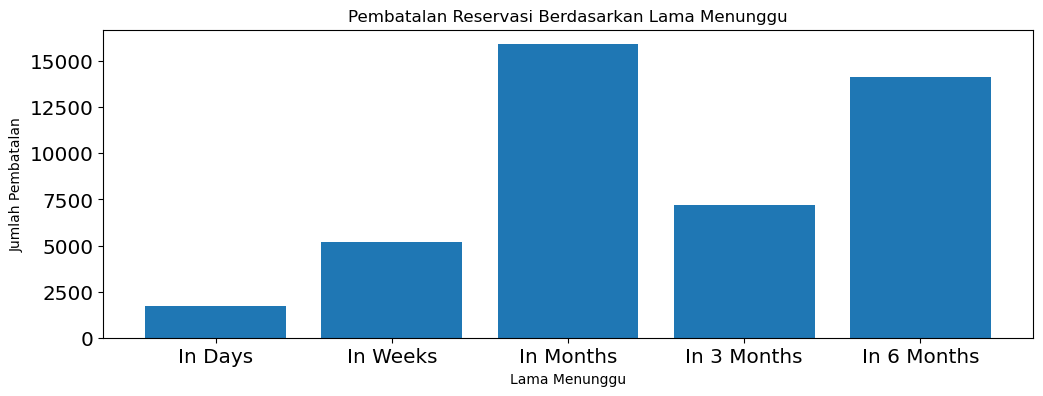

In [ ]:
plt.bar(data['kategori'], data['lead_time'])

plt.title('Pembatalan Reservasi Berdasarkan Lama Menunggu')
plt.xlabel('Lama Menunggu')
plt.ylabel('Jumlah Pembatalan')

# plt.xticks(rotation=90)

plt.show()